In [3]:
import pandas as pd
import duckdb
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
query = """
select aei.ano ,aei.mes, count(*) as atendimentos
from main.atendimentos_em_ijui aei 
group by aei.mes, aei.ano
order by aei.ano asc,aei.mes asc
"""

In [4]:
database = duckdb.connect("database/database_pi.db")

rows = database.query(query).fetchall()

dataframe = pd.DataFrame(rows)
dataframe.columns = ["ano","mes","atendimentos"]

dataframe_train = dataframe.query(f"ano == 2019")
dataframe = dataframe.query(f"atendimentos > 500")

dataframe = dataframe.query(f"ano == 2020")

label = "atendimentos"
print(dataframe)
print(dataframe_train)

     ano  mes  atendimentos
65  2020    1          4420
66  2020    2          4948
67  2020    3          3740
68  2020    4          1510
69  2020    5          2148
70  2020    6          2428
71  2020    7          3078
72  2020    8          3464
73  2020    9          2954
74  2020   10          3056
75  2020   11          3040
76  2020   12          2898
     ano  mes  atendimentos
53  2019    1          3150
54  2019    2          2904
55  2019    3          3712
56  2019    4          2632
57  2019    5          3232
58  2019    6          2948
59  2019    7          4054
60  2019    8          4304
61  2019    9          5504
62  2019   10          5796
63  2019   11          5140
64  2019   12          4096


In [5]:
clf = LinearRegression()

x = np.array(dataframe_train.drop(label, axis=1).drop("ano", axis=1))
x_test = np.array(dataframe.drop(label, axis=1).drop("ano", axis=1))

y = np.array(dataframe_train[label])
y_test = np.array(dataframe[label])

clf.fit(x ,y)

predicted = clf.predict(x_test)

# Calcular as métricas de avaliação
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2 * 100}%')

Mean Squared Error (MSE): 2560942.153846154
Root Mean Squared Error (RMSE): 1600.2943959928605
Mean Absolute Error (MAE): 1524.2564102564102
R^2 Score: -218.98117727203115%


<Axes: xlabel='mes'>

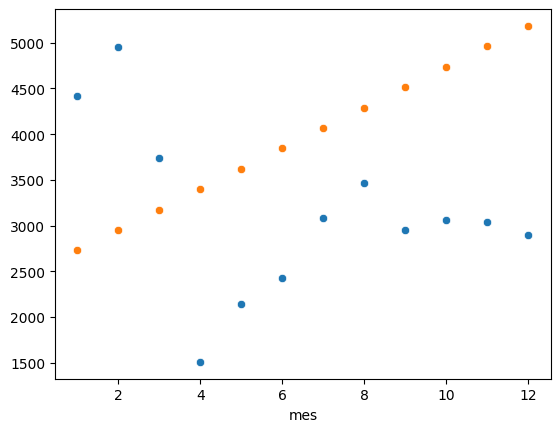

In [6]:
sns.scatterplot(dataframe, x="mes", y=y_test)

sns.scatterplot(dataframe, x="mes", y=predicted)